In [248]:
import numpy as np
import pandas as pd

In [249]:
data = pd.read_csv('E:\py programs\codsoft_ml\datasets\sms spam\spam.csv', encoding='ISO-8859-1')
#without mentioning the encoding option it gives an UnicodeDecodeError

In [250]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
243,ham,Although i told u dat i'm into baig face watch...,NaN,NaN,NaN
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...,NaN,NaN,NaN
675,ham,"I dont knw pa, i just drink milk..",NaN,NaN,NaN
2227,ham,Oh k.k..where did you take test?,NaN,NaN,NaN
3684,ham,Wake me up at &lt;#&gt; am morning:),NaN,NaN,NaN


In [251]:
data.shape

(5572, 5)

 Steps we will perform in this project :-
 1. Data cleaning
 2. EDA - Exploratory Data Analysis
 3. Text Preprocessing
 4. Model building
 5. Evaluation
 6. Improvemnts

## 1. Data Cleaning

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [253]:
 #dropping the last 3 columns
 data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [254]:
data.sample(5)

,v1,v2
33,ham,For fear of fainting with the of all that hous...
2303,ham,Should I tell my friend not to come round til ...
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
3868,ham,No let me do the math. Your not good at it.
303,ham,He is a womdarfull actor


In [255]:
#renaming the columns to make it descriptive
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.sample(5)

,target,text
4756,ham,"hey, looks like I was wrong and one of the kap..."
2825,ham,Ok lor...
786,ham,It does it on its own. Most of the time it fix...
4164,spam,"Dear Voucher Holder, To claim this weeks offer..."
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...


In [256]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [257]:
# we will convert the "ham" and "spam" to numbers
data['target'] = encoder.fit_transform(data['target'])

In [258]:
data.head()
# 0 -> ham
# 1 -> spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [259]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [260]:
#checking duplicates
data.duplicated().sum()

403

In [261]:
data = data.drop_duplicates(keep='first')

In [262]:
data.duplicated().sum()

0

In [263]:
data.shape

(5169, 2)

## 2. EDA

In [264]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [265]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

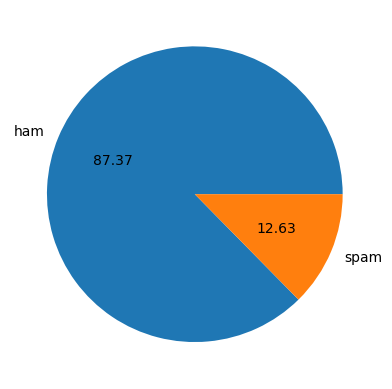

In [266]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Data is very unbalanced

In [267]:
import nltk

In [268]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [269]:
#no of characters
data['num_of_characters'] = data['text'].apply(len)

In [270]:
data.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [271]:
#no of words
data['num_of_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [272]:
data.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [273]:
data['num_of_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [274]:
data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [275]:
data[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [276]:
# ham
data[data['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [277]:
# spam
data[data['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [278]:
import seaborn as sns

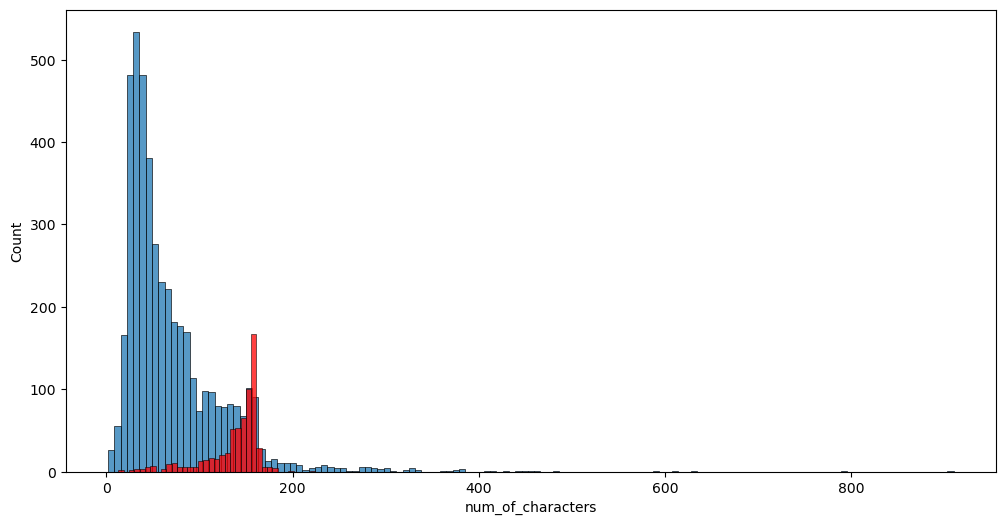

In [279]:
#graphical visualization of the data obtained

plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_of_characters'])
sns.histplot(data[data['target'] == 1]['num_of_characters'],color='red')
plt.show()

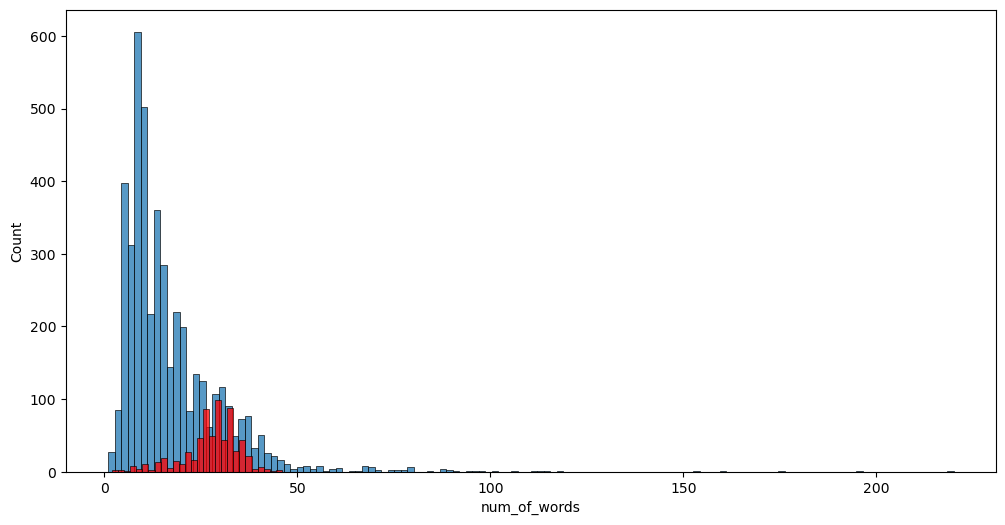

In [280]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_of_words'])
sns.histplot(data[data['target'] == 1]['num_of_words'],color='red')
plt.show()

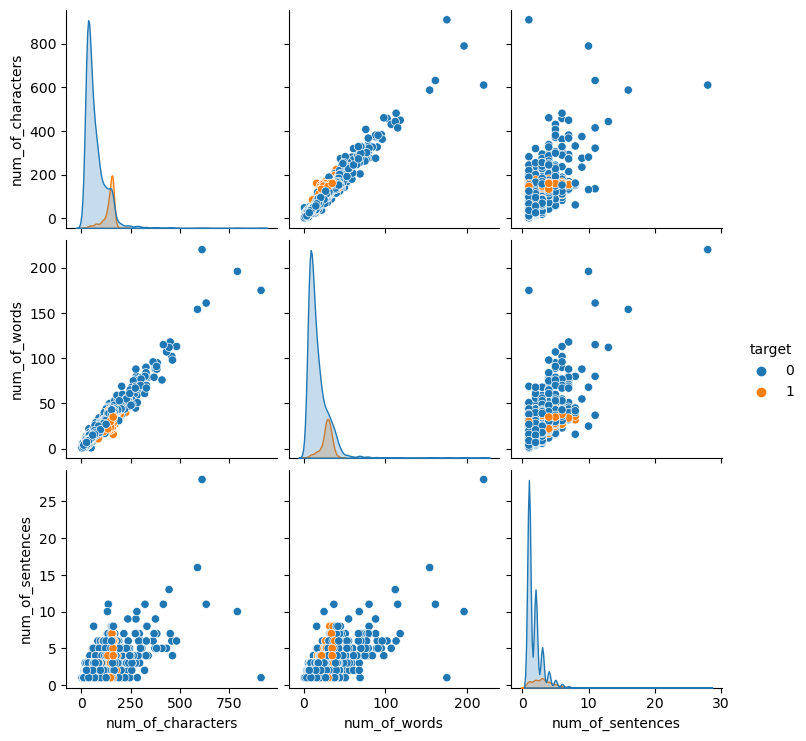

In [281]:
sns.pairplot(data, hue='target')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_272\3609695378.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


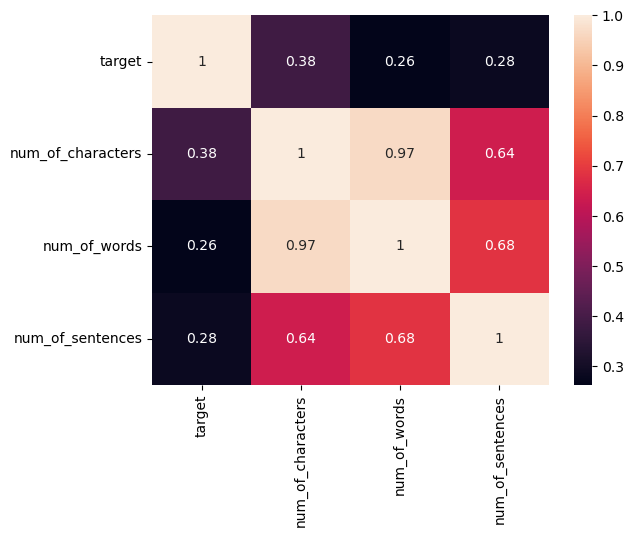

In [282]:
#heatmap visualization of correlations

sns.heatmap(data.corr(), annot=True)
plt.show()

 ## 3. Data Preprocessing
i) Lower case

ii) Tokenization

iii) Removing special characters

iv) Removing stop words and punctuation

v) Stemming

In [283]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [284]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('loving') -> output will be love (just a sample how stemming works)
from nltk.corpus import stopwords
# stopwords.words('english') will give words like -> ['i','me','my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", ....
import string

In [285]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [286]:
data['transformed_text'] = data['text'].apply(transform_text)

In [287]:
data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [288]:
#wordcloud visualization
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [289]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

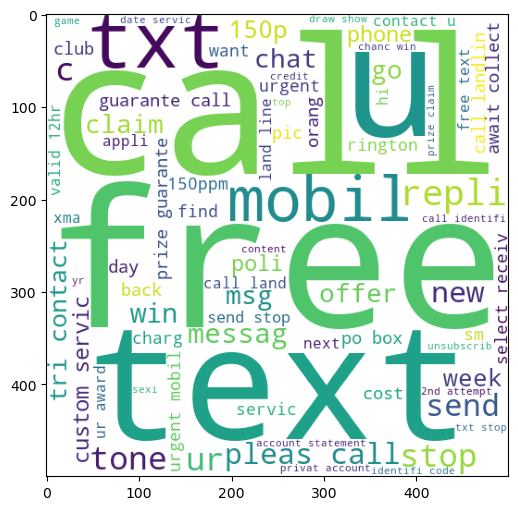

In [290]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [291]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

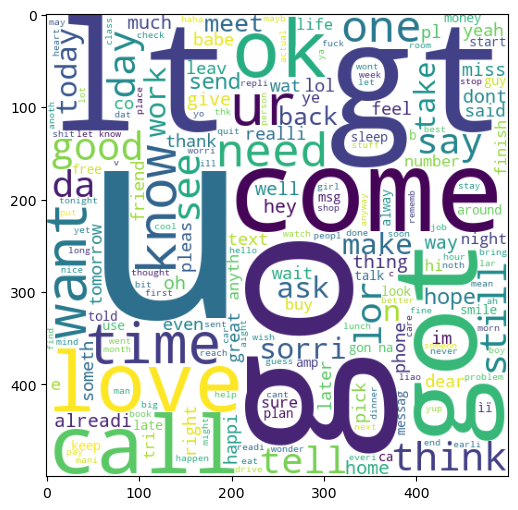

In [292]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [293]:
data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [294]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

In [295]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [296]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)

35394

In [297]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [298]:
# Text Vectorization
# using Bag of Words
data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [299]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() #less precise
tfidf = TfidfVectorizer(max_features=3000) #with max_Features it gives more accuracy with precision

In [300]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

X.shape

(5169, 3000)

In [301]:
y = data['target'].values

In [302]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [303]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [304]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [305]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [306]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [307]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Hence we will use tfidf --> MNB

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [309]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [310]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [311]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [312]:
train_classifier(svc,X_train,y_train,X_test,y_test) #demo run of the function

(0.9758220502901354, 0.9747899159663865)

In [313]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [314]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [315]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [316]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


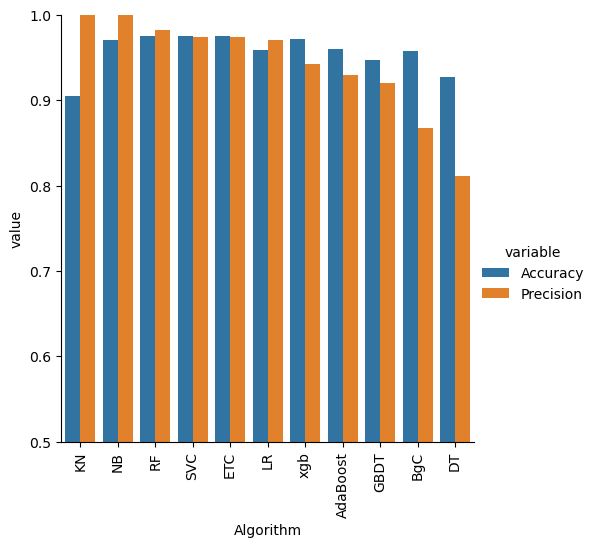

In [317]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model improve
1. Change the max_features parameter of TfIdf

In [318]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


After comparing all the algorithms, it can be concluded that MNB gives us the best performance.

In terms of accuracy if we see then SVC comes on top but as the data is highly imbalanced, accuracy is not a good measure of performance.

Both MNB and KNC have precision of 1, but KNC's accuracy is way lower than MNB.

Hence considering both the factors, MNB has given the best performance here.